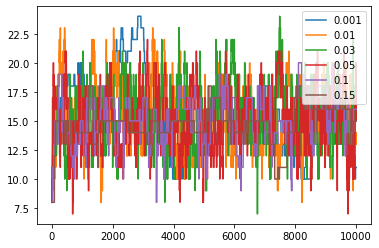

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
a=np.eye(8,dtype = np.int8)
a=a.reshape(64)
def metroplis(start, value, proposal, niter, nburn=0 ,**kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        #print(proposed.reshape(8,8))
        #if value(current, **kwargs)==0 : p=value(proposed, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        #print(p)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

def value(x,**kwargs) :
    _ = kwargs
    x1=x.reshape(8,8)
    for i in range(7):
        if np.dot(x1[i],x1[i+1])!=0 : return 0
    for i in range(8):
        b=np.roll(x1[i],1)
        b[0]=0
        if np.dot(x1[i],b)!=0 : return 0
    return 1

def proposal(x,sigma,**kwargs) :
    _ = kwargs
    eps = np.asarray(sigma)
    x=np.asarray(x,np.int8)
    #print(x.shape)
    y=np.zeros(64)
    for i in range(64) :
        if x[i]==1 : 
            if np.random.rand() < eps : y[i] = 0 
            else : y[i] = 1
        else : 
            if np.random.rand() > 1-eps : y[i] = 1 
            else : y[i] = 0
    return y

f=[]
for eps in [0.001, 0.01, 0.03, 0.05, 0.1, 0.15]:
    post = metroplis(a, value, proposal, 10000, sigma=eps)
    d=np.zeros(len(post))
    for i in range(len(post)) :
        d[i]=post[i].sum()
    f.append(d)
    plt.plot(d, label=eps)
plt.legend()
plt.show()
#print(post[100].reshape(8,8))

In [118]:
def g_test(x, start, end):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)
print(f[0].shape)
for i in range(6):
    print(g_test(f[i][8000:],0.1,0.3))

(10001,)
Ttest_indResult(statistic=-19.515065938744456, pvalue=1.66762716203538e-62)
Ttest_indResult(statistic=3.7106818293506247, pvalue=0.00022584950488345693)
Ttest_indResult(statistic=-0.8407924179527504, pvalue=0.40092597937661845)
Ttest_indResult(statistic=1.4423239917758326, pvalue=0.14979562772358393)
Ttest_indResult(statistic=23.449067908759048, pvalue=1.3841474736944679e-74)
Ttest_indResult(statistic=30.590078360574413, pvalue=7.787290367007595e-136)


Логично взять где-то около 0.05 (4 значение).Посмотрим на график траектории (в сравнении в eps=0.01)

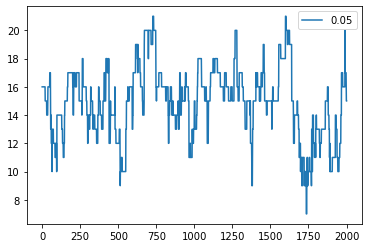

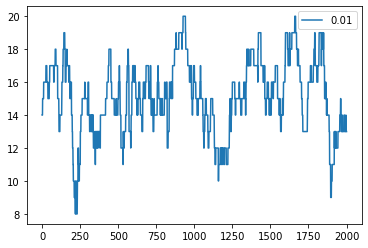

In [101]:
plt.plot(f[3][8000:], label=0.05)
plt.legend()
plt.show()
plt.plot(f[1][8000:], label=0.01)
plt.legend()
plt.show()

In [ ]:
Уж очень много мы стоим на месте, попробуем увеличить размер выборки.

In [ ]:
1) Посчитаем примерно среднее кол-во закрашенных вершин.

In [102]:
ans=f[3][7000:]
print(ans.sum()/ans.size)

15.32655781406198


Увеличим размер выборки и посмотрим на график траектории,примерное среднее,и t-критерий Стьюдента.

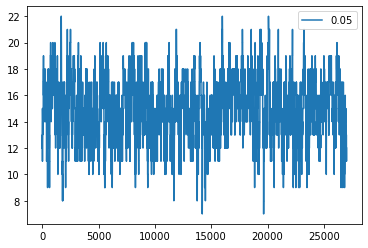

15.010851449946298


In [125]:
post = metroplis(a, value, proposal, 30000, 3000, sigma=0.05)
d=np.zeros(len(post))
for i in range(len(post)) :
    d[i]=post[i].sum()
plt.plot(d, label=0.05)
plt.legend()
plt.show()
print(d.sum()/d.size)

In [129]:
g_test(d,0.3,0.3)

Ttest_indResult(statistic=1.3530097716863487, pvalue=0.17607139256375323)

Это как раз то,что просили сделать в пункте 2.

3)Распределение числа закрашенных вершин

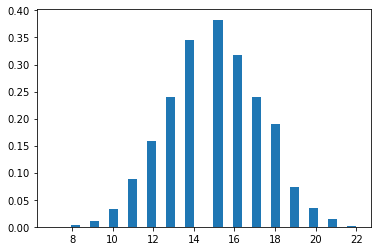

In [130]:
plt.hist(d, bins=32, density=True)
plt.show()

In [ ]:
4) Случайный граф

In [144]:
a=np.random.rand()
print(a)
for i in range (len(post)):
    if i/len(post)>a :  break
print(i)
print(post[i-1].reshape(8,8))

0.8661583646637833
23388
[[1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1.]]
